In [1]:
# Installing the fairlearn package
!pip install fairlearn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 231.5/231.5 kB 4.4 MB/s eta 0:00:00a 0:00:01


In [2]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import balanced_accuracy_score, precision_score, roc_auc_score
from fairlearn.metrics import MetricFrame, selection_rate, demographic_parity_difference, equalized_odds_difference
from fairlearn.metrics import demographic_parity_ratio, equalized_odds_ratio
import numpy as np
import pandas as pd
from sklearn.datasets import load_diabetes
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score

In [3]:
!pip install xlrd

In [3]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler


#reading file
file_path = '/content/default of credit card clients (2).xls'

# Read Excel file into a DataFrame
df = pd.read_excel(file_path)

print(df)


X=df.drop(columns=['Y'])
X=X.drop(columns=['Unnamed: 0'])

X=X.drop(index=0)

y=df['Y']
y=y.drop(index=0)

y=pd.to_numeric(y)
y.head()
for column in X:
    X[column] = pd.to_numeric(X[column])
    X[column].head()


#minmax scaler or standard scaler

#split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#
#sensitive_test = X_test['X2']



y.head()

      Unnamed: 0         X1   X2         X3        X4   X5     X6     X7  \
0             ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2   
1              1      20000    2          2         1   24      2      2   
2              2     120000    2          2         2   26     -1      2   
3              3      90000    2          2         2   34      0      0   
4              4      50000    2          2         1   37      0      0   
...          ...        ...  ...        ...       ...  ...    ...    ...   
29996      29996     220000    1          3         1   39      0      0   
29997      29997     150000    1          3         2   43     -1     -1   
29998      29998      30000    1          2         2   37      4      3   
29999      29999      80000    1          3         1   41      1     -1   
30000      30000      50000    1          2         1   46      0      0   

          X8     X9  ...        X15        X16        X17       X18       X19  \
0     

1    1
2    1
3    0
4    0
5    0
Name: Y, dtype: int64

In [33]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
import pandas as pd


X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

Mean Accuracy for Grid Search Random Forest across Nested Cross-Validation: 0.8099999999999999
Standard Deviation of Accuracy for Grid Search Random Forest across Nested Cross-Validation: 0.005665577237325296


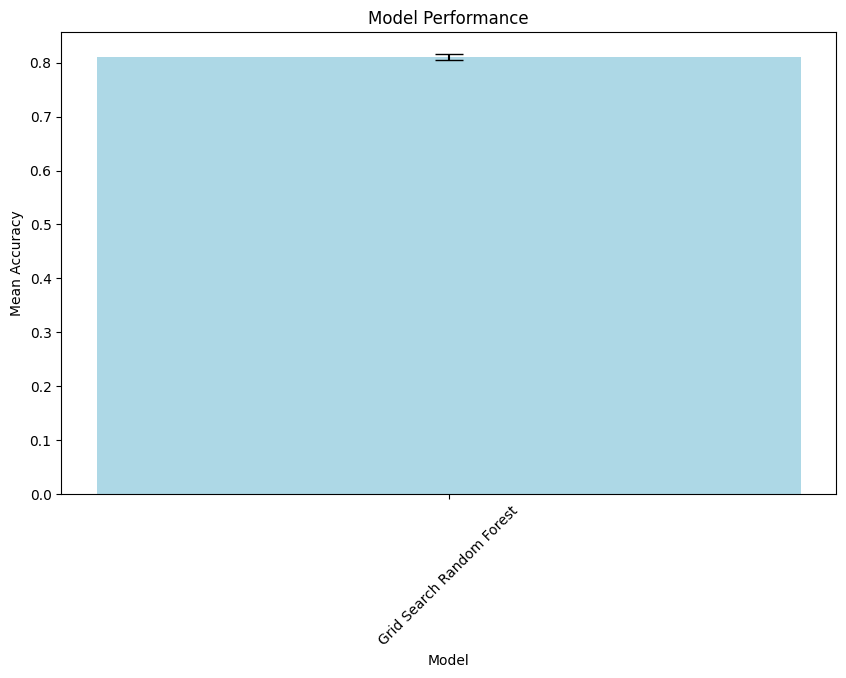

Best Hyperparameters for Grid Search Random Forest: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 150}
Accuracy on the Test Set: 0.8233


In [36]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import matplotlib.pyplot as plt


# Split the data into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Define the hyperparameter grid for Random Forest Classifier
param_grid_rf = {
    'n_estimators': [50, 100, 150],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize Random Forest model
rf = RandomForestClassifier()

# Set up GridSearchCV with inner cross-validation for hyperparameter tuning
grid_search_rf = GridSearchCV(estimator=rf, param_grid=param_grid_rf, cv=3, scoring='accuracy', n_jobs=-1)

# Fit the data to perform the grid search on the training set
grid_search_rf.fit(X_train, y_train)

# Print the best hyperparameters for the model
best_params_rf = grid_search_rf.best_params_

# Outer Loop: Perform nested cross-validation with outer cross-validation
models = {"Grid Search Random Forest": grid_search_rf}

# Create a dictionary to store the mean accuracy and variance (standard deviation) for each model
model_performance = {}

for model_name, model in models.items():
    nested_cv_scores = cross_val_score(model, X_val, y_val, cv=5, scoring='accuracy')
    mean_nested_cv_score = np.mean(nested_cv_scores)
    std_nested_cv_score = np.std(nested_cv_scores)
    model_performance[model_name] = {
        "Mean Accuracy": mean_nested_cv_score,
        "Variance (Standard Deviation)": std_nested_cv_score
    }

    print(f"Mean Accuracy for {model_name} across Nested Cross-Validation:", mean_nested_cv_score)
    print(f"Standard Deviation of Accuracy for {model_name} across Nested Cross-Validation:", std_nested_cv_score)

# Create a bar chart to visualize model performance
plt.figure(figsize=(10, 6))
plt.bar(models.keys(), [model_performance[model_name]["Mean Accuracy"] for model_name in models],
        yerr=[model_performance[model_name]["Variance (Standard Deviation)"] for model_name in models],
        color='lightblue', capsize=10)
plt.xlabel('Model')
plt.ylabel('Mean Accuracy')
plt.title('Model Performance')
plt.xticks(rotation=45)
plt.show()

# Print the best hyperparameters for the Grid Search Random Forest
print("Best Hyperparameters for Grid Search Random Forest:", best_params_rf)

# Evaluate the model on the test set
test_accuracy = grid_search_rf.score(X_test, y_test)
print(f"Accuracy on the Test Set: {test_accuracy:.4f}")


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
6 fits failed out of a total of 15.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
6 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py", line 340, in fit
    self._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 600, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_

Mean Accuracy for Randomized Search Random Forest across Nested Cross-Validation: 0.8117777777777778
Standard Deviation of Accuracy for Randomized Search Random Forest across Nested Cross-Validation: 0.00728943087415852


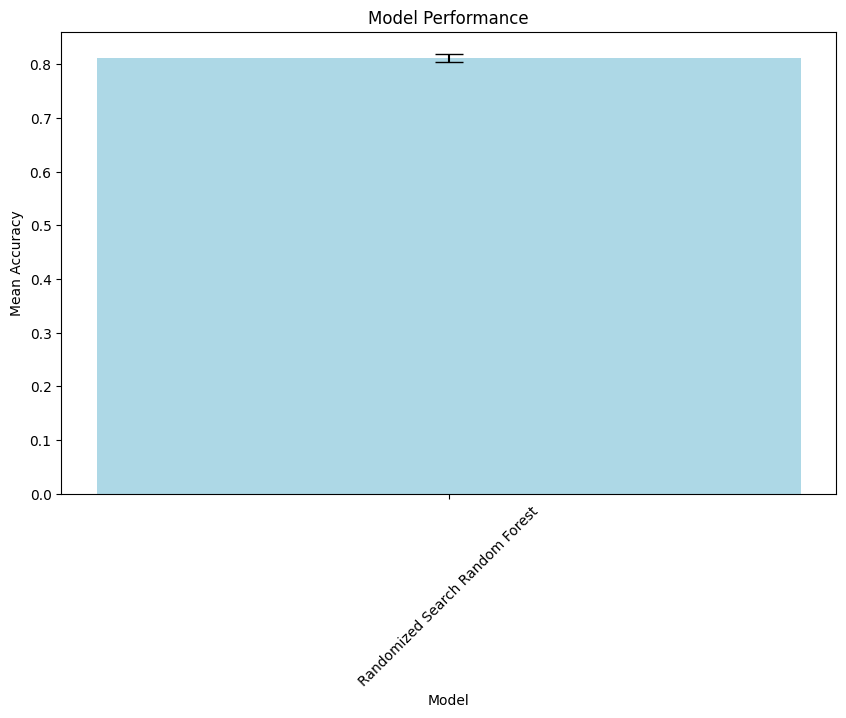

Best Hyperparameters for Randomized Search Random Forest: {'n_estimators': 50, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_depth': 40}
Accuracy on the Test Set: 0.8233


In [38]:
from sklearn.model_selection import RandomizedSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import matplotlib.pyplot as plt

# Assuming you have defined X and y earlier

# Define the hyperparameter grid for Random Forest Classifier (Randomized Search)
param_dist_rf = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None,10, 20, 30,40],
    'min_samples_split':[1,2, 5,10],
    'min_samples_leaf':[1, 2, 4,6]
}

# Initialize Random Forest model
rf = RandomForestClassifier()

# Set up RandomizedSearchCV with inner cross-validation for hyperparameter tuning
random_search_rf = RandomizedSearchCV(estimator=rf, param_distributions=param_dist_rf, n_iter=5, cv=3, scoring='accuracy', n_jobs=-1)

# Fit the data to perform the random search
random_search_rf.fit(X_train, y_train)

# Print the best hyperparameters for the model
best_params_rf_random = random_search_rf.best_params_

# Outer Loop: Perform nested cross-validation with outer cross-validation
models = {"Randomized Search Random Forest": random_search_rf}

# Create a dictionary to store the mean accuracy and variance (standard deviation) for each model
model_performance = {}

for model_name, model in models.items():
    nested_cv_scores = cross_val_score(model, X_val, y_val, cv=5, scoring='accuracy')
    mean_nested_cv_score = np.mean(nested_cv_scores)
    std_nested_cv_score = np.std(nested_cv_scores)
    model_performance[model_name] = {
        "Mean Accuracy": mean_nested_cv_score,
        "Variance (Standard Deviation)": std_nested_cv_score
    }

    print(f"Mean Accuracy for {model_name} across Nested Cross-Validation:", mean_nested_cv_score)
    print(f"Standard Deviation of Accuracy for {model_name} across Nested Cross-Validation:", std_nested_cv_score)

# Create a bar chart to visualize model performance
plt.figure(figsize=(10, 6))
plt.bar(models.keys(), [model_performance[model_name]["Mean Accuracy"] for model_name in models],
        yerr=[model_performance[model_name]["Variance (Standard Deviation)"] for model_name in models],
        color='lightblue', capsize=10)
plt.xlabel('Model')
plt.ylabel('Mean Accuracy')
plt.title('Model Performance')
plt.xticks(rotation=45)
plt.show()

# Print the best hyperparameters for the Randomized Search Random Forest
print("Best Hyperparameters for Randomized Search Random Forest:", best_params_rf_random)

# Evaluate the model on the test set
test_accuracy = grid_search_rf.score(X_test, y_test)
print(f"Accuracy on the Test Set: {test_accuracy:.4f}")

Grid Search Accuracy Variance: 2.200660833333342e-05
Grid Search Accuracy Standard Deviation: 0.0046911201576311625
Random Search Accuracy Variance: 1.9771788888888877e-05
Random Search Accuracy Standard Deviation: 0.0044465479744279016


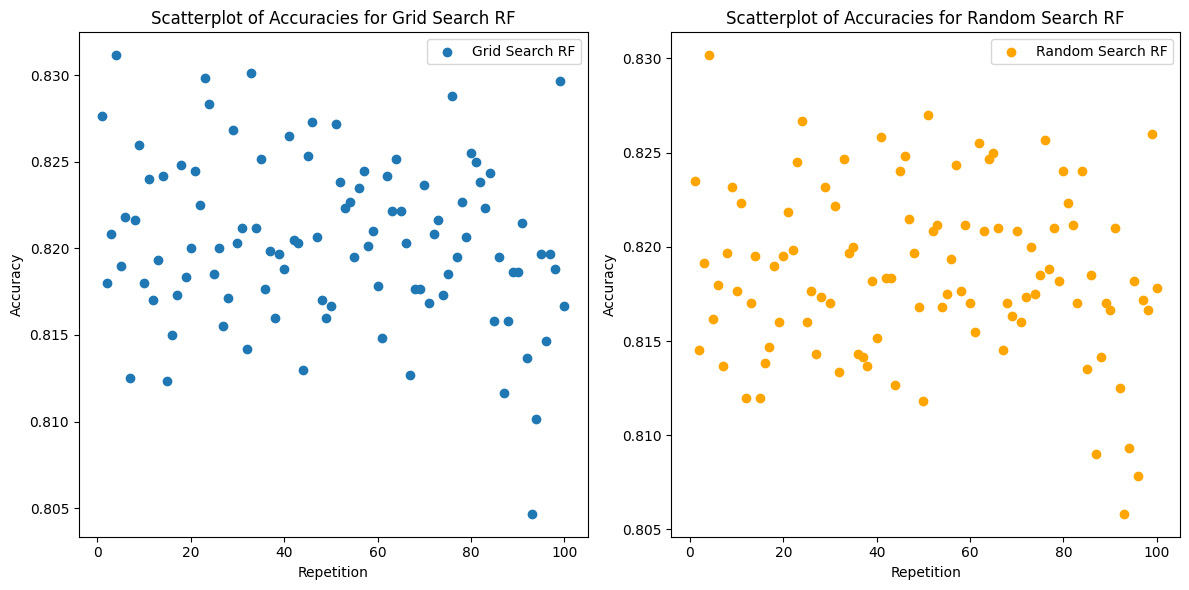

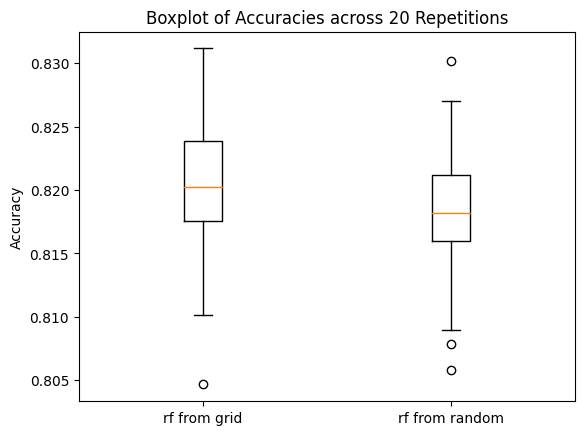

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Assuming you have defined X and y earlier

repetitions = 100

# Initialize a list to store accuracy scores
gs_accuracy = []
rs_accuracy = []

# Repeat the train/test split 20 times with different random seeds
for i in range(repetitions):
    random_state = i  # Use i as the random seed

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state)

    # Grid Search Random Forest: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 150}
    # Randomized Search Random Forest: {'n_estimators': 50, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_depth': 40}
    rf_gs = RandomForestClassifier(max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=150)
    rf_rs = RandomForestClassifier(max_depth=40, min_samples_leaf=4, min_samples_split=5, n_estimators=50)

    rf_gs.fit(X_train, y_train)
    rf_rs.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred_gs = rf_gs.predict(X_test)
    y_pred_rs = rf_rs.predict(X_test)

    # Calculate accuracy score and append it to the list
    gs_accuracy.append(accuracy_score(y_test, y_pred_gs))
    rs_accuracy.append(accuracy_score(y_test, y_pred_rs))

# Calculate variance and spread for each set of accuracies
gs_variance = np.var(gs_accuracy)
gs_std_deviation = np.std(gs_accuracy)
rs_variance = np.var(rs_accuracy)
rs_std_deviation = np.std(rs_accuracy)

# Print the results
print("Grid Search Accuracy Variance:", gs_variance)
print("Grid Search Accuracy Standard Deviation:", gs_std_deviation)
print("Random Search Accuracy Variance:", rs_variance)
print("Random Search Accuracy Standard Deviation:", rs_std_deviation)

# Create scatterplots for accuracies
plt.figure(figsize=(12, 6))

# Scatterplot for Grid Search Random Forest
plt.subplot(1, 2, 1)
plt.scatter(range(1, repetitions + 1), gs_accuracy, label='Grid Search RF')
plt.title('Scatterplot of Accuracies for Grid Search RF')
plt.xlabel('Repetition')
plt.ylabel('Accuracy')
plt.legend()

# Scatterplot for Random Search Random Forest
plt.subplot(1, 2, 2)
plt.scatter(range(1, repetitions + 1), rs_accuracy, label='Random Search RF', color='orange')
plt.title('Scatterplot of Accuracies for Random Search RF')
plt.xlabel('Repetition')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


# Plot a boxplot of the accuracies
plt.figure()
plt.boxplot([gs_accuracy, rs_accuracy])
plt.title('Boxplot of Accuracies across 20 Repetitions')
plt.xticks([1,2],['rf from grid','rf from random'])
plt.ylabel('Accuracy')
plt.show()
